<a href="https://colab.research.google.com/github/rizqyjoe/FER2013_VGG16_Modified/blob/main/Modified%20VGG16/Non%20Aug/Epoch%20100/003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pre-processing

In [5]:
import tensorflow as tf
import keras
from keras import backend as K
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.utils import np_utils

import random

tf.random.set_seed(1234)
np.random.seed(1234)

from keras.initializers import glorot_uniform

In [6]:
#load file
data= pd.read_csv('/content/drive/MyDrive/Dataset/fer2013 dataset/fer2013/fer2013.csv')
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [7]:
data.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [8]:
data.Usage.value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [9]:
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
labels=np.array(("Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"))

In [10]:
#split data 
train_set = data[(data.Usage == 'Training')] 
val_set = data[(data.Usage == 'PublicTest')]
test_set = data[(data.Usage == 'PrivateTest')] 
X_train = np.array(list(map(str.split, train_set.pixels)), np.float32) 
X_val = np.array(list(map(str.split, val_set.pixels)), np.float32) 
X_test = np.array(list(map(str.split, test_set.pixels)), np.float32) 
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1) 
X_val = X_val.reshape(X_val.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [11]:
num_classes = 7

y_train = train_set.emotion 
y_train = np_utils.to_categorical(y_train, num_classes) 
y_val = val_set.emotion 
y_val = np_utils.to_categorical(y_val, num_classes) 
y_test = test_set.emotion 
y_test = np_utils.to_categorical(y_test, num_classes)

In [12]:
print("x_train:",X_train.shape)
print("y_train:",y_train.shape)
print("x_val:",X_val.shape)
print("y_val:",y_val.shape)
print("x_test:",X_test.shape)
print("y_test:",y_test.shape)

x_train: (28709, 48, 48, 1)
y_train: (28709, 7)
x_val: (3589, 48, 48, 1)
y_val: (3589, 7)
x_test: (3589, 48, 48, 1)
y_test: (3589, 7)


In [13]:
#data augmentation
'''datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=10,
                             width_shift_range=0.2,
                             height_shift_range=0.2, 
                             zoom_range=0.2,
                             horizontal_flip=True)'''

datagen = ImageDataGenerator(rescale=1./255)

testgen = ImageDataGenerator(rescale=1./255)

datagen.fit(X_train)
batch_size = 64

In [14]:
train_flow = datagen.flow(X_train, y_train, batch_size=batch_size) 
val_flow = testgen.flow(X_val, y_val, batch_size=batch_size) 
test_flow = testgen.flow(X_test, y_test, batch_size=batch_size)

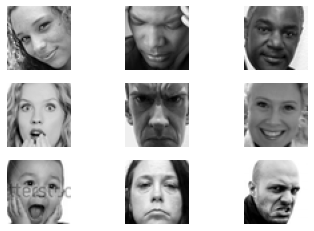

In [15]:
#displaying sample images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9): 
        plt.axis('off') 
        plt.subplot(330 + 1 + i) 
        plt.imshow(X_batch[i].reshape(48, 48), cmap=plt.get_cmap('gray'))
    plt.axis('off') 
    plt.show() 
    break

# Training Model

In [16]:
#Model Fix
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D

input_shape = (48, 48, 1)

model = Sequential()

model.add(Conv2D(filters=64,input_shape=(input_shape),kernel_size=(3,3),padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.6))

#model.add(Flatten())
model.add(GlobalAveragePooling2D())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=num_classes, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       7

In [ ]:
#Model VGG16
'''from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D

input_shape = (48, 48, 1)

model = Sequential()

model.add(Conv2D(filters=64,input_shape=(input_shape),kernel_size=(3,3),padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=1)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(4096,activation='relu'))
model.add(Dense(4096,activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

# print the model summary
model.summary()

In [ ]:
#save plot model to file
from keras.utils.vis_utils import plot_model
plot_model(model, to_file="model fix.png", show_shapes=True, show_layer_names=False)

In [17]:
#compile model
from keras.optimizers import Adam,SGD,RMSprop

opt = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [18]:
# fit the model
num_epochs = 100
history = model.fit(train_flow, 
                    steps_per_epoch=len(X_train) // batch_size, 
                    epochs=num_epochs,  
                    verbose=1,  
                    validation_data=val_flow,  
                    validation_steps=len(X_val) // batch_size)

Epoch 1/100
448/448 [==============================] - 87s 78ms/step - loss: 3.0672 - accuracy: 0.1810 - val_loss: 1.8284 - val_accuracy: 0.2506
Epoch 2/100
448/448 [==============================] - 33s 74ms/step - loss: 1.9324 - accuracy: 0.2084 - val_loss: 1.8103 - val_accuracy: 0.2494
Epoch 3/100
448/448 [==============================] - 33s 73ms/step - loss: 1.8514 - accuracy: 0.2284 - val_loss: 1.8044 - val_accuracy: 0.2539
Epoch 4/100
448/448 [==============================] - 33s 73ms/step - loss: 1.8217 - accuracy: 0.2385 - val_loss: 1.7900 - val_accuracy: 0.2559
Epoch 5/100
448/448 [==============================] - 33s 74ms/step - loss: 1.7876 - accuracy: 0.2610 - val_loss: 1.7172 - val_accuracy: 0.2930
Epoch 6/100
448/448 [==============================] - 33s 73ms/step - loss: 1.7266 - accuracy: 0.2882 - val_loss: 1.6504 - val_accuracy: 0.3384
Epoch 7/100
448/448 [==============================] - 33s 74ms/step - loss: 1.6537 - accuracy: 0.3319 - val_loss: 1.7512 - val_ac

# Evaluate

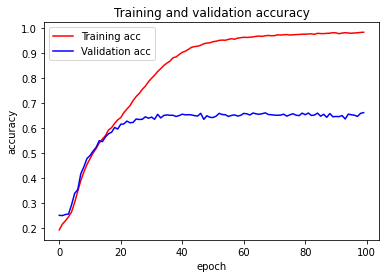

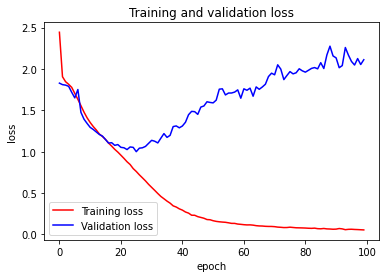

In [19]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
num_epochs = range(len(accuracy))
plt.plot(num_epochs, accuracy, 'r', label='Training acc')
plt.plot(num_epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(num_epochs, loss, 'r', label='Training loss')
plt.plot(num_epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

In [20]:
trainloss = model.evaluate(train_flow, steps=len(X_train) / batch_size) 
print("Train Loss " + str(trainloss[0]))
print("Train Acc: " + str(trainloss[1]))
valloss = model.evaluate(val_flow, steps=len(X_val) / batch_size) 
print("Val Loss " + str(valloss[0]))
print("Val Acc: " + str(valloss[1]))
testloss = model.evaluate(test_flow, steps=len(X_test) / batch_size) 
print("Test Loss " + str(testloss[0]))
print("Test Acc: " + str(testloss[1]))

448/448 [==============================] - 10s 21ms/step - loss: 0.0100 - accuracy: 0.9967
Train Loss 0.009988256730139256
Train Acc: 0.9966909289360046
56/56 [==============================] - 2s 27ms/step - loss: 2.1088 - accuracy: 0.6609
Val Loss 2.108751058578491
Val Acc: 0.6609083414077759
56/56 [==============================] - 1s 22ms/step - loss: 1.9555 - accuracy: 0.6715
Test Loss 1.9555294513702393
Test Acc: 0.6714962124824524


In [17]:
def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Unnormalized confusion matrix',
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_test, y_pred)
    
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
        
    np.set_printoptions(precision=2)
    
    plt.rcParams["figure.figsize"] = (8,8)  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.min() + (cm.max() - cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True expression')
    plt.xlabel('Predicted expression')
    plt.show()

In [18]:
y_pred_ = model.predict(X_test/255., verbose=1)
y_pred = np.argmax(y_pred_, axis=1)
t_te = np.argmax(y_test, axis=1)

113/113 [==============================] - 3s 12ms/step


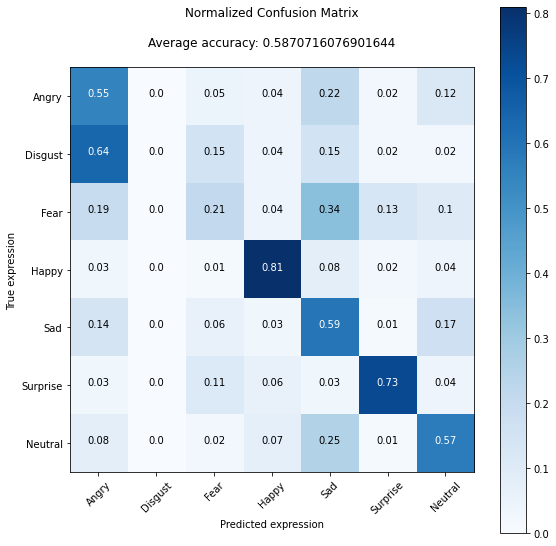

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools

fig = plot_confusion_matrix(y_test=t_te, y_pred=y_pred,
                      classes=labels,
                      normalize=True,
                      cmap=plt.cm.Blues,
                      title='Normalized Confusion Matrix'+'\n\n'+'Average accuracy: ' + str(np.sum(y_pred == t_te)/len(t_te)) + '\n')

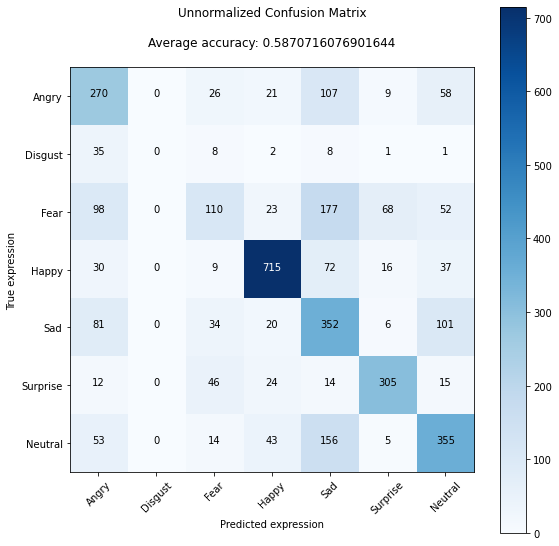

In [20]:
fig = plot_confusion_matrix(y_test=t_te, y_pred=y_pred,
                      classes=labels,
                      normalize=False,
                      cmap=plt.cm.Blues,
                      title='Unnormalized Confusion Matrix'+'\n\n'+'Average accuracy: ' + str(np.sum(y_pred == t_te)/len(t_te)) + '\n')

In [21]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
print(classification_report(t_te, y_pred, target_names=emotions.values()))

              precision    recall  f1-score   support

       Angry       0.47      0.55      0.50       491
     Disgust       0.00      0.00      0.00        55
        Fear       0.45      0.21      0.28       528
       Happy       0.84      0.81      0.83       879
         Sad       0.40      0.59      0.48       594
    Surprise       0.74      0.73      0.74       416
     Neutral       0.57      0.57      0.57       626

    accuracy                           0.59      3589
   macro avg       0.50      0.49      0.49      3589
weighted avg       0.59      0.59      0.58      3589



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
model.save("/content/drive/MyDrive/Colab Notebooks/Model/ModelFix_Adam0.0001_epoch100_noAug.h5")
print("saved")

saved


#Load Model

In [23]:
from keras.models import load_model
model_load = load_model('/content/drive/MyDrive/Colab Notebooks/Model/ModelFix_Adam0.0001_epoch100_noAug.h5')

model_load.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       7

In [29]:
trainloss = model_load.evaluate(train_flow, steps=len(X_train) / batch_size) 
print("Train Loss " + str(trainloss[0]))
print("Train Acc: " + str(trainloss[1]))
valloss = model_load.evaluate(val_flow, steps=len(X_val) / batch_size) 
print("Val Loss " + str(valloss[0]))
print("Val Acc: " + str(valloss[1]))
testloss = model_load.evaluate(test_flow, steps=len(X_test) / batch_size) 
print("Test Loss " + str(testloss[0]))
print("Test Acc: " + str(testloss[1]))

448/448 [==============================] - 11s 21ms/step - loss: 0.5001 - accuracy: 0.8355
Train Loss 0.5001171231269836
Train Acc: 0.8354871273040771
56/56 [==============================] - 1s 21ms/step - loss: 2.6764 - accuracy: 0.6188
Val Loss 2.6763973236083984
Val Acc: 0.6188353300094604
56/56 [==============================] - 1s 21ms/step - loss: 1.5269 - accuracy: 0.6239
Test Loss 1.5268553495407104
Test Acc: 0.6238506436347961


In [30]:
def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Unnormalized confusion matrix',
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_test, y_pred)
    
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
        
    np.set_printoptions(precision=2)
        
    plt.rcParams["figure.figsize"] = (8,8)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.min() + (cm.max() - cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True expression')
    plt.xlabel('Predicted expression')
    plt.show()

In [31]:
y_pred_ = model_load.predict(X_test/255., verbose=1)
y_pred = np.argmax(y_pred_, axis=1)
t_te = np.argmax(y_test, axis=1)

113/113 [==============================] - 3s 12ms/step


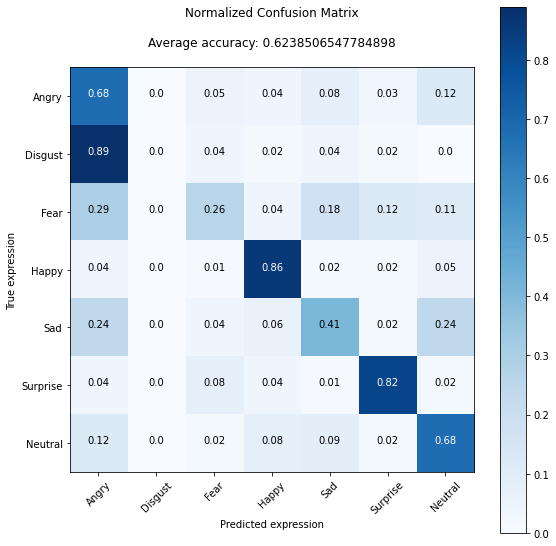

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools

fig = plot_confusion_matrix(y_test=t_te, y_pred=y_pred,
                      classes=labels,
                      normalize=True,
                      cmap=plt.cm.Blues,
                      title='Normalized Confusion Matrix'+'\n\n'+'Average accuracy: ' + str(np.sum(y_pred == t_te)/len(t_te)) + '\n')

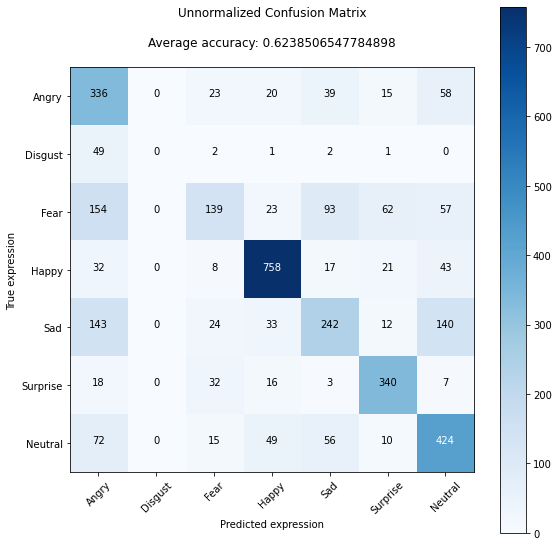

In [33]:
fig = plot_confusion_matrix(y_test=t_te, y_pred=y_pred,
                      classes=labels,
                      normalize=False,
                      cmap=plt.cm.Blues,
                      title='Unnormalized Confusion Matrix'+'\n\n'+'Average accuracy: ' + str(np.sum(y_pred == t_te)/len(t_te)) + '\n')

In [34]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
print(classification_report(t_te, y_pred, target_names=emotions.values()))

              precision    recall  f1-score   support

       Angry       0.42      0.68      0.52       491
     Disgust       0.00      0.00      0.00        55
        Fear       0.57      0.26      0.36       528
       Happy       0.84      0.86      0.85       879
         Sad       0.54      0.41      0.46       594
    Surprise       0.74      0.82      0.78       416
     Neutral       0.58      0.68      0.63       626

    accuracy                           0.62      3589
   macro avg       0.53      0.53      0.51      3589
weighted avg       0.62      0.62      0.61      3589



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
